In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
data = pd.read_csv("Covid19-Google-Mobility-Report.csv")
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-15,1.0,6.0,-2.0,-1.0,2.0,1.0
1,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-16,-2.0,5.0,2.0,-2.0,2.0,1.0
2,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-17,-3.0,2.0,4.0,-3.0,2.0,1.0
3,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-18,-3.0,2.0,1.0,-2.0,2.0,1.0
4,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-19,-3.0,1.0,0.0,-1.0,2.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441517 entries, 0 to 2441516
Data columns (total 13 columns):
country_region_code                                   object
country_region                                        object
sub_region_1                                          object
sub_region_2                                          object
iso_3166_2_code                                       object
census_fips_code                                      float64
date                                                  object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtypes: float64(7), object(6)
memory usage: 242.2+ MB


In [ ]:
data.country_region.unique()

array(['United Arab Emirates', 'Antigua and Barbuda', 'Angola',
       'Argentina', 'Austria', 'Australia', 'Barbados', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Benin', 'Bolivia', 'Brazil',
       'The Bahamas', 'Belize', 'Canada', 'Switzerland', "Côte d'Ivoire",
       'Chile', 'Cameroon', 'Colombia', 'Cape Verde', 'Czechia',
       'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia',
       'Egypt', 'Spain', 'Finland', 'France', 'Gabon', 'United Kingdom',
       'Guatemala', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indonesia', 'Ireland', 'Israel', 'India', 'Italy', 'Jamaica',
       'Jordan', 'Japan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'Kuwait',
       'Lebanon', 'Lithuania', 'Latvia', 'Libya', 'Mongolia', 'Mauritius',
       'Mexico', 'Malaysia', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Nicaragua', 'Netherlands', 'Norway', 'New Zealand', 'Oman',
       'Peru', 'Philippines', 'Pakistan', 'Poland', 'Portugal',
       'Paraguay', 'Romania', 'Rwa

In [ ]:
date = data.date.unique()
date

array(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-

Text(0.5, 1.0, 'US data')

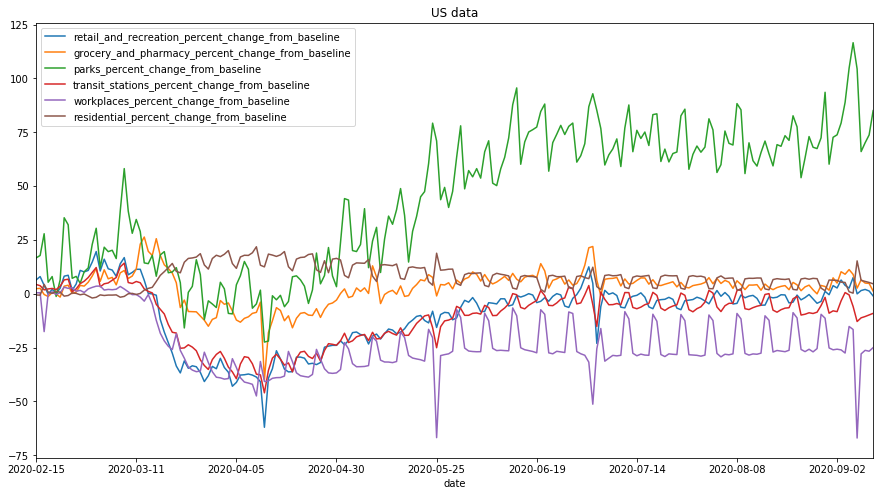

In [ ]:
US_data = data[data.country_region_code=='US']
US_data_avg = US_data.groupby(['date']).mean()
US_data_avg = US_data_avg.loc[:, US_data_avg.columns!='census_fips_code']
US_data_avg.plot(figsize=(15,8))
plt.title("US data")

In [ ]:
US_data['WeekDay']=US_data['date'].apply(lambda x:pd.to_datetime(x).weekday())

Text(0.5, 1.0, 'Spain data')

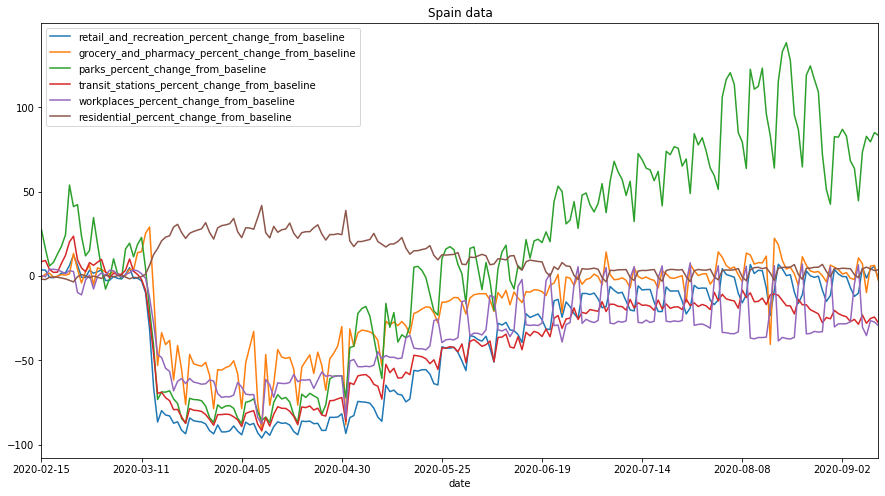

In [ ]:
Spain_data = data[data.country_region=='Spain']
Spain_data_avg = Spain_data.groupby(['date']).mean()
Spain_data_avg = Spain_data_avg.loc[:, Spain_data_avg.columns!='census_fips_code']
Spain_data_avg.plot(figsize=(15,8))
plt.title("Spain data")

In [ ]:
US_data = data[data.country_region_code=='US']
US_data_avg = US_data.groupby(['date']).mean()
US_data_avg = US_data_avg.loc[:, US_data_avg.columns!='census_fips_code']
US_data_avg.plot(figsize=(15,8))
plt.title("US data")

Text(0.5, 1.0, 'Korea data')

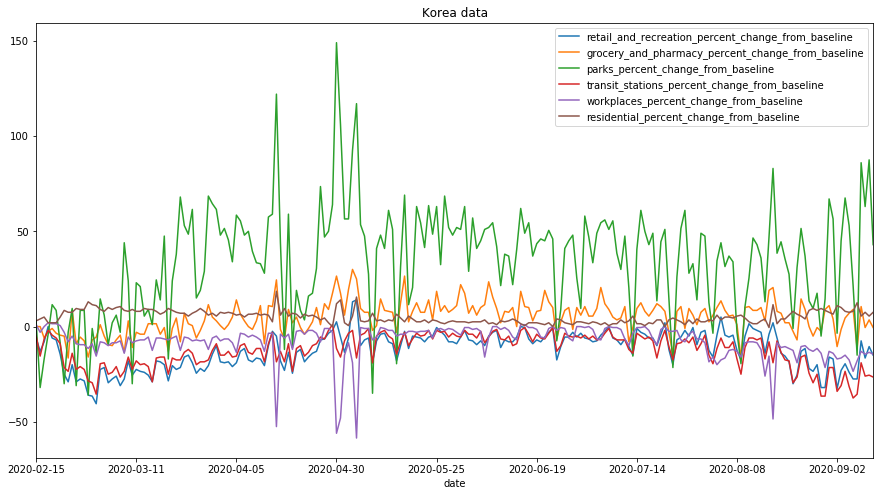

In [ ]:
Korea_data = data[data.country_region=='South Korea']
Korea_data_avg = Korea_data.groupby(['date']).mean()
Korea_data_avg = Korea_data_avg.loc[:, Korea_data_avg.columns!='census_fips_code']
Korea_data_avg.plot(figsize=(15,8))
plt.title("Korea data")

Text(0.5, 1.0, 'Japan data')

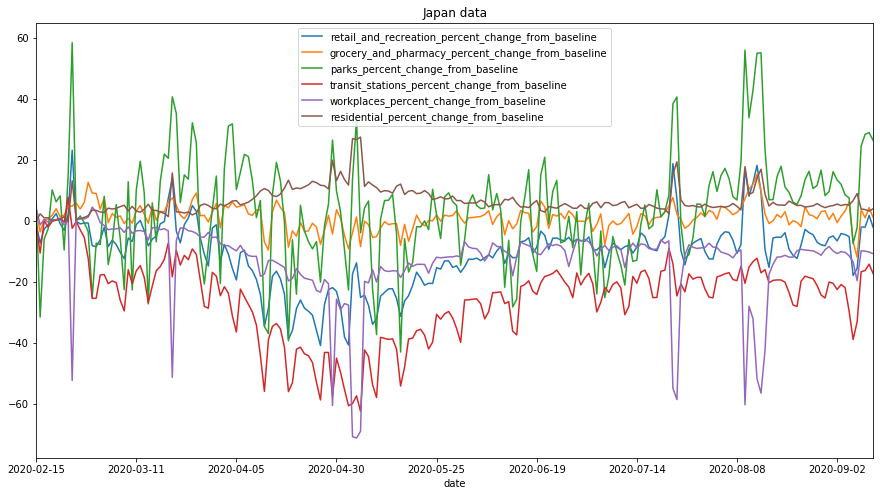

In [ ]:
Japan_data = data[data.country_region=='Japan']
Japan_data_avg = Japan_data.groupby(['date']).mean()
Japan_data_avg = Japan_data_avg.loc[:, Japan_data_avg.columns!='census_fips_code']
Japan_data_avg.plot(figsize=(15,8))
plt.title("Japan data")

Text(0.5, 1.0, 'Italy data')

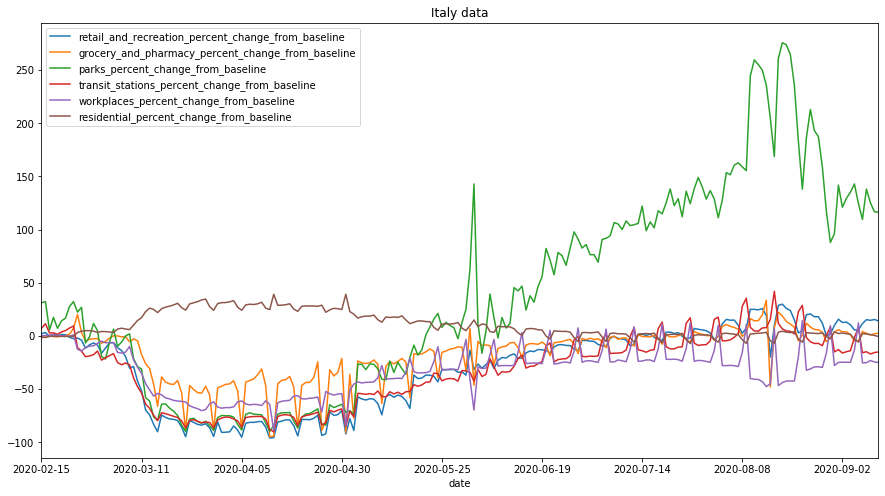

In [ ]:
Italy_data = data[data.country_region=='Italy']
Italy_data_avg = Italy_data.groupby(['date']).mean()
Italy_data_avg = Italy_data_avg.loc[:, Italy_data_avg.columns!='census_fips_code']
Italy_data_avg.plot(figsize=(15,8))
plt.title("Italy data")